In [1]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib 
from scipy import stats

In [2]:
from math import gamma

# 2.3.1 ベータ分布

In [3]:
def CB(a, b):
    return gamma(a + b) / (gamma(a) * gamma(b))

In [8]:
a = [0.5, 0.6, 1.0, 10.0, 10.0]
b = [0.5, 0.8, 1.0, 40.0, 5.0]
TRIAL_NUMBERS = 5

In [5]:
def Beta(mu, a, b):
    return CB(a, b) * (mu ** (a - 1)) * ((1 - mu) ** (b - 1))

In [6]:
mu = np.linspace(0, 1, 100)


/var/folders/3p/cjys33qs3bz3kt04rghlr7qw0000gn/T/ipykernel_43204/3530630687.py:2: RuntimeWarning: divide by zero encountered in power
  return CB(a, b) * (mu ** (a - 1)) * ((1 - mu) ** (b - 1))


/var/folders/3p/cjys33qs3bz3kt04rghlr7qw0000gn/T/ipykernel_43204/3530630687.py:2: RuntimeWarning: divide by zero encountered in power
  return CB(a, b) * (mu ** (a - 1)) * ((1 - mu) ** (b - 1))
/var/folders/3p/cjys33qs3bz3kt04rghlr7qw0000gn/T/ipykernel_43204/3530630687.py:2: RuntimeWarning: divide by zero encountered in power
  return CB(a, b) * (mu ** (a - 1)) * ((1 - mu) ** (b - 1))


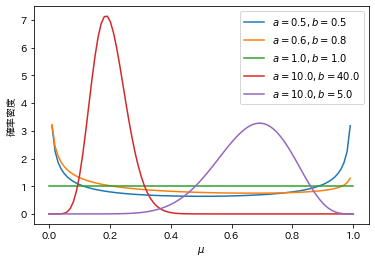

In [15]:
fig, ax = plt.subplots()
y = []
c = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'] # 色
l = ['$a=0.5, b=0.5$', '$a=0.6, b=0.8$', '$a=1.0, b=1.0$', '$a=10.0, b=40.0$', '$a=10.0, b=5.0$']
for i in range(TRIAL_NUMBERS):
    y = Beta(mu, a[i], b[i])
    ax.plot(mu, y, color=c[i], label=l[i])
ax.set_xlabel('$\mu$')
ax.set_ylabel('確率密度')
ax.legend()


# 2.3.2 ディリクレ分布

In [27]:
def CD(alpha):
    K = len(alpha)
    denominator = 1
    sum_alpha = 0
    for k in range(K):
        denominator *= gamma(alpha[k])
        sum_alpha += alpha[k]
    molecule = gamma(sum_alpha)
    return molecule / denominator

In [28]:
def Dir3D(pi, alpha):
    prod = 1
    for k in range(len(pi)):
        prod *= pi[k] ** (alpha[k] - 1)
    return CD(alpha) * prod

In [29]:
pi1 = np.linspace(0, 1, 100)
pi2 = np.linspace(0, 1, 100)
PI1, PI2 = np.meshgrid(pi1, pi2)
pi3 = []
PI1[PI1 + PI2 > 1] = 0
PI2[PI1 + PI2 > 1] = 0
alpha = [10.0, 10.0, 10.0]

for pi1_, pi2_ , pi3_ in zip(PI1.flatten(), PI2.flatten(),  (1 - PI1 - PI2).flatten()):
    pi3_ = 1 - pi1_ - pi2_
    pi3.append(Dir3D([pi1_, pi2_, pi3_], alpha))


NameError: name 'zlim' is not defined

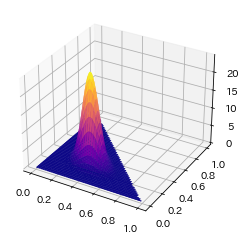

In [31]:
PI3 = np.array(pi3).reshape(PI1.shape)
ax3d = plt.axes(projection='3d')
ax3d.plot_surface(PI1, PI2, PI3,cmap='plasma')
# ax3d.set_zlim(zlim)
ax3d.set_xlabel("$x_1$")
ax3d.set_ylabel("$x_2$")
ax3d.set_zlabel("pdf$(x_1,x_2,1-x_1-x_2)$")
ax3d.set_title("Dir($\\vec{\\alpha} = $" + "%s)" % self.para)
plt.show()